### Importing Libraries

In [641]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style('darkgrid')

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 250
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2})
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 4000x2000 with 0 Axes>

### Specifying path

In [642]:
import os as os

anime_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','anime.csv')
ratings1_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating1.csv')
ratings2_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating2.csv')

### Importing Datasets

In [643]:
anime_dataset = pd.read_csv(anime_datapath)
anime_dataset

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [644]:
ratings1_dataset = pd.read_csv(ratings1_datapath)
ratings1_dataset

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
3906863,36791,2795,7
3906864,36791,2904,10
3906865,36791,3270,10
3906866,36791,3299,8


In [645]:
ratings2_dataset = pd.read_csv(ratings2_datapath)
ratings2_dataset

,user_id,anime_id,rating
0,36791,3467,7
1,36791,3503,8
2,36791,3549,9
3,36791,3653,8
4,36791,3654,7
...,...,...,...
3906864,73515,16512,7
3906865,73515,17187,9
3906866,73515,22145,10
3906867,73516,790,9


In [646]:
rating_data = pd.concat([ratings1_dataset, ratings2_dataset],axis=0)
rating_data.reset_index(inplace=True)

rating_data

,index,user_id,anime_id,rating
0,0,1,20,-1
1,1,1,24,-1
2,2,1,79,-1
3,3,1,226,-1
4,4,1,241,-1
...,...,...,...,...
7813732,3906864,73515,16512,7
7813733,3906865,73515,17187,9
7813734,3906866,73515,22145,10
7813735,3906867,73516,790,9


### EDA

#### Information about the dataset

In [647]:
print("Shape of the anime dataset is :",anime_dataset.shape)
anime_dataset.head()

Shape of the anime dataset is : (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [648]:
anime_dataset.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [649]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [650]:
print("Shape of the rating dataset is :",rating_data.shape)
rating_data.head()

Shape of the rating dataset is : (7813737, 4)


,index,user_id,anime_id,rating
0,0,1,20,-1
1,1,1,24,-1
2,2,1,79,-1
3,3,1,226,-1
4,4,1,241,-1


In [651]:
rating_data.dtypes

index       int64
user_id     int64
anime_id    int64
rating      int64
dtype: object

In [652]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 4 columns):
 #   Column    Dtype
---  ------    -----
 0   index     int64
 1   user_id   int64
 2   anime_id  int64
 3   rating    int64
dtypes: int64(4)
memory usage: 238.5 MB


### Dataset Summary

In [653]:
# making a copy of the dataset

anime_df = anime_dataset.copy()
rating_df = rating_data.copy()

#### Anime data

In [654]:
anime_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,12294.0,NaN,NaN,NaN,14058.221653,11455.294701,1.0,3484.25,10260.5,24794.5,34527.0
name,12294,12292,Shi Wan Ge Leng Xiaohua,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,12232,3264,Hentai,823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,12269,6,TV,3787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,12294,187,1,5677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,12064.0,NaN,NaN,NaN,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,NaN,NaN,NaN,18071.338864,54820.676925,5.0,225.0,1550.0,9437.0,1013917.0


In [655]:
anime_df.describe(include='object').T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


#### Checking for null values

In [656]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [657]:
anime_df.isnull().sum()/len(anime_dataset)*100

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    0.000000
rating      1.870831
members     0.000000
dtype: float64

In [658]:
print("Percentage of null values: ")
for column, val in anime_df.isnull().sum().items():
    if val>0:
        print(f"{column}: {val/len(anime_df)*100:.2f}%")


Percentage of null values: 
genre: 0.50%
type: 0.20%
rating: 1.87%


#### Since the percentage of null values in each column is low, We'll remove them.

In [659]:
# Drop all rows have null values
anime_df = anime_df.dropna(axis=0).reset_index(drop=True)

In [660]:
anime_df.isnull().sum()/len(anime_dataset)*100

anime_id    0.0
name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
members     0.0
dtype: float64

#### Checking for duplicate values

In [661]:
# Check duplicated values
anime_df[anime_df.duplicated()].shape[0]

0

In [662]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


##### Rating data

In [663]:
rating_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7813737.0,1.953434e+06,1.127816e+06,0.0,976717.0,1953434.0,2930151.0,3906868.0
user_id,7813737.0,3.672796e+04,2.099795e+04,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8.909072e+03,8.883950e+03,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030e+00,3.727800e+00,-1.0,6.0,7.0,9.0,10.0


In [664]:
# Check null values
print("Percentages of null values: ")
for column, val in rating_df.isnull().sum().items():
    if val > 0:
        print(f"{column}: {val/len(rating_df)*100:.2f}%")

Percentages of null values: 


In [665]:
# Check duplicated values
rating_df[rating_df.duplicated()].shape[0]

0

In [666]:
# Drop duplicated value
rating_df.drop_duplicates(keep='first',inplace=True)

In [667]:
anime_dataset['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

### Univariate Analysis

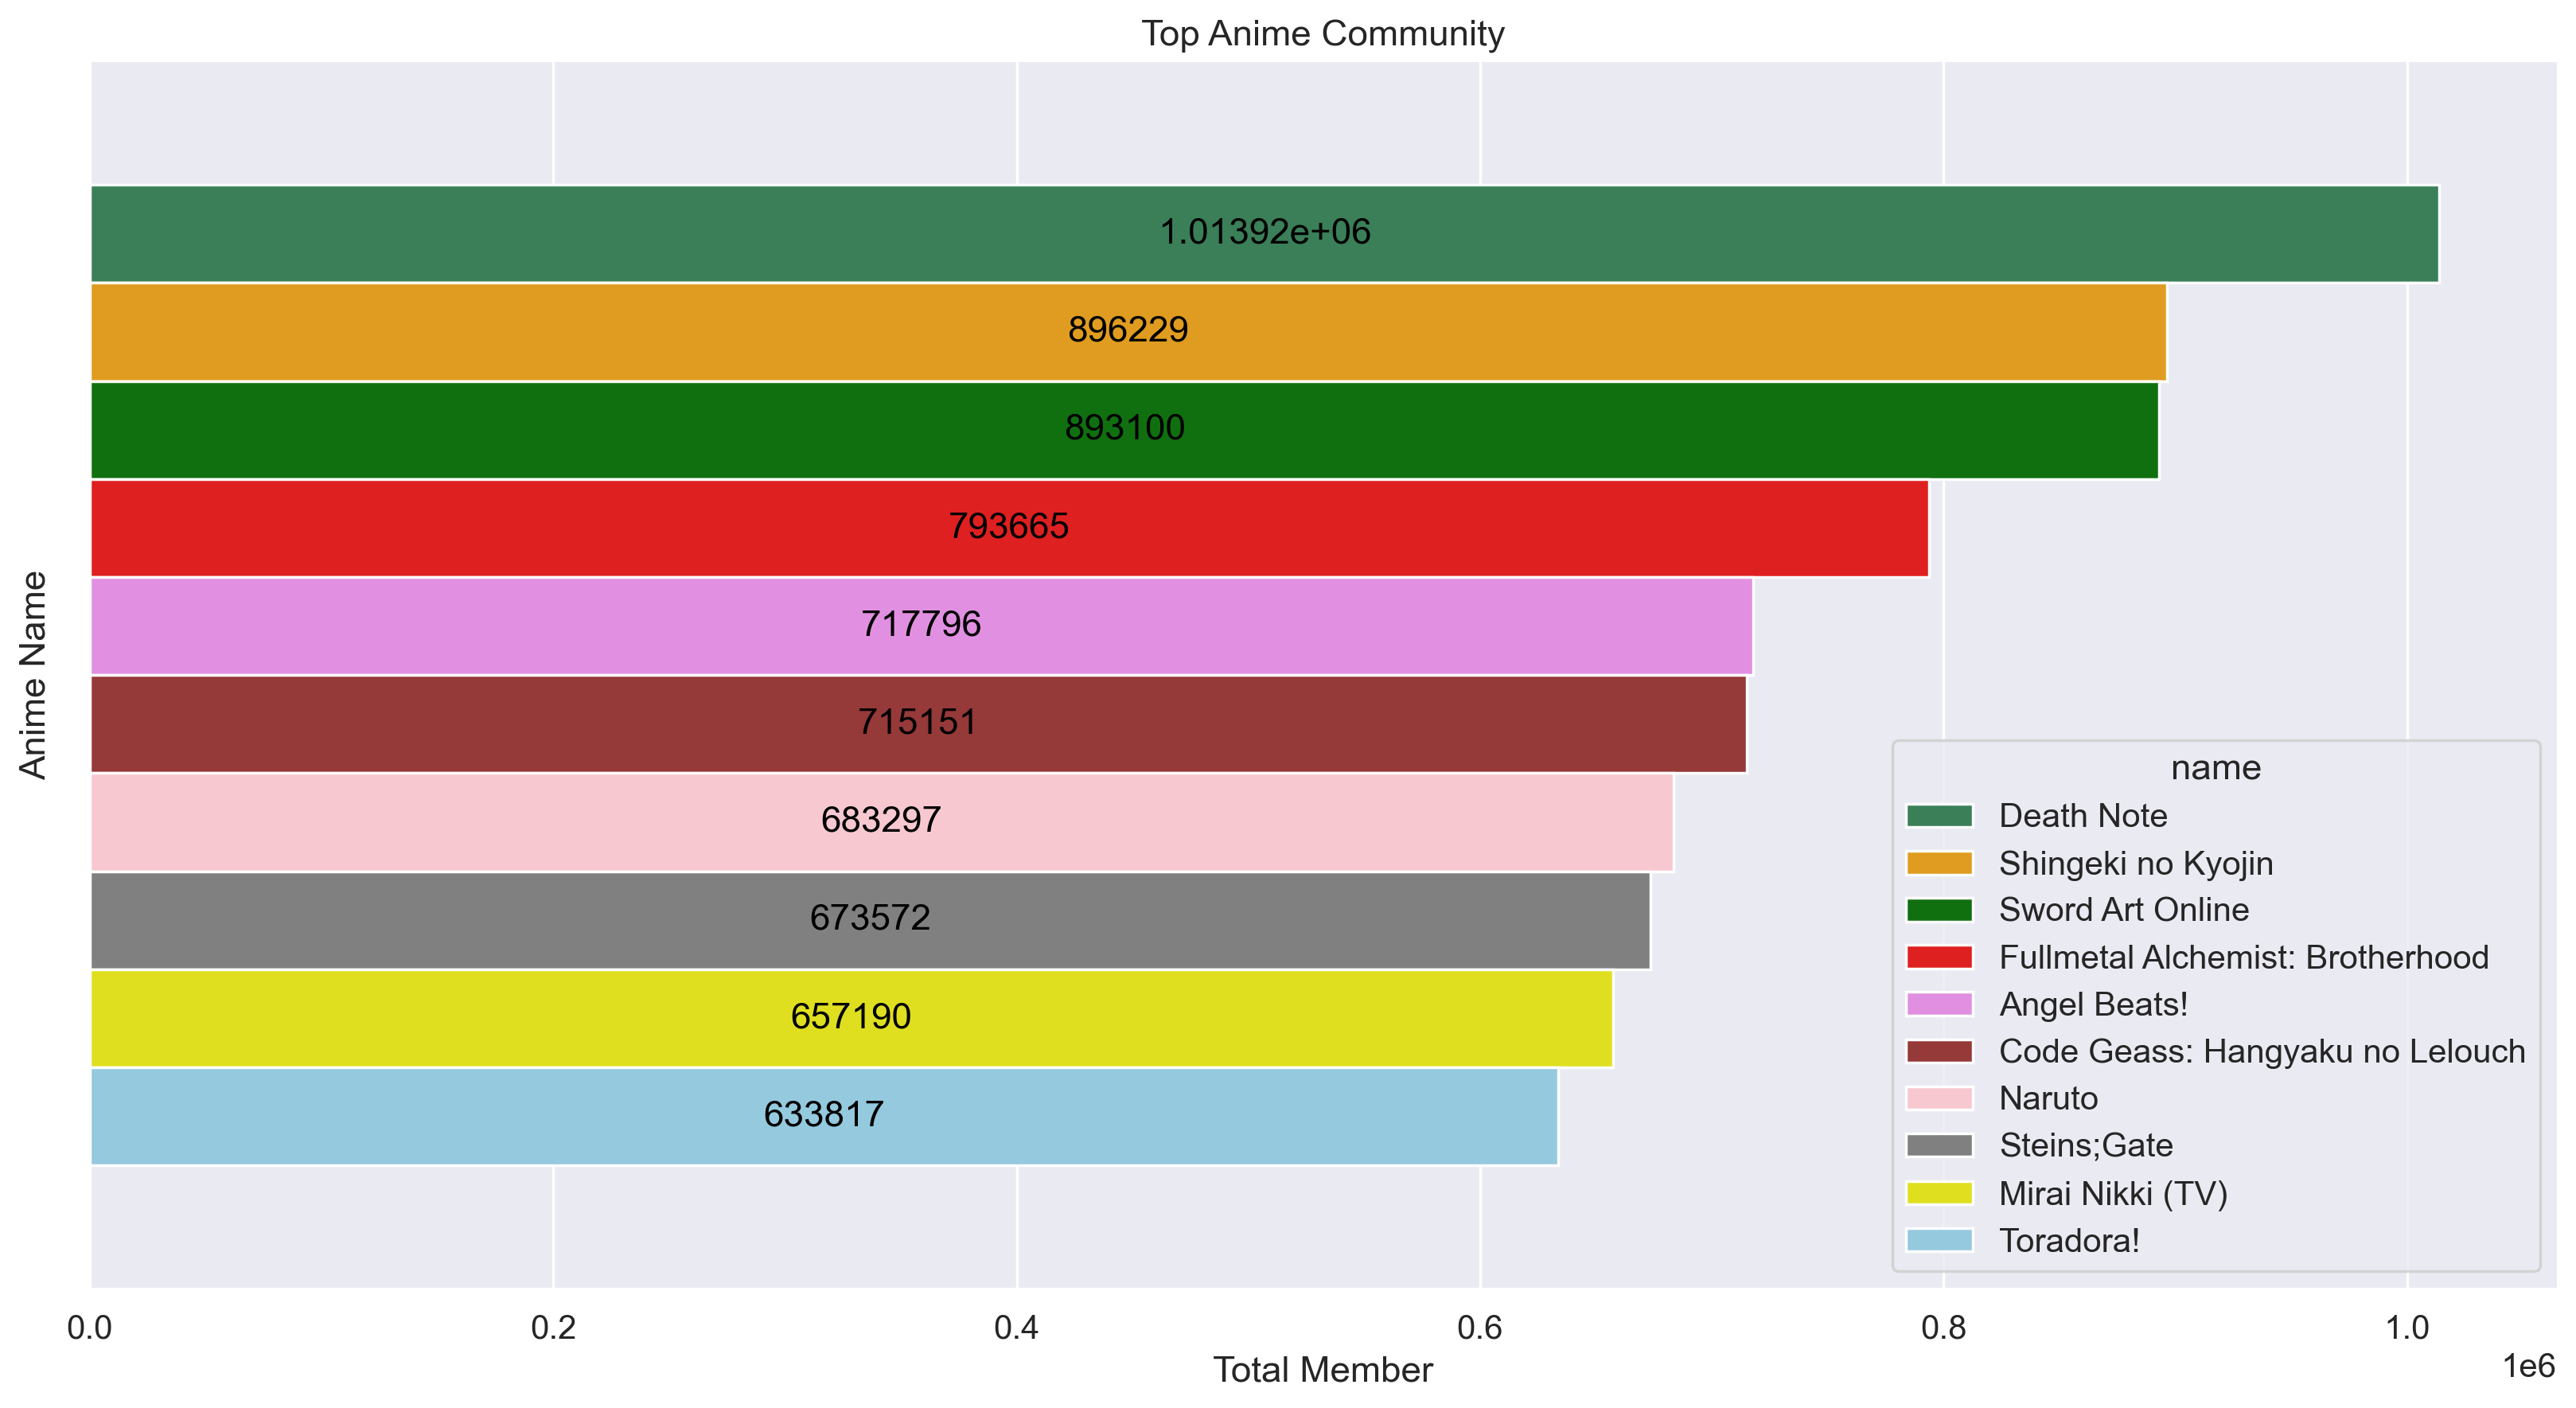

In [668]:
top_anime = anime_df.sort_values(["members"],ascending=False)
colors = ['seagreen','orange','green','red','violet','brown','pink','grey','yellow','skyblue']

# plt.subplots(figsize=(15,10))
# plt.figure(figsize=(15,6))
# p = sns.barplot(x='members', y='name',data=top_anime[:10],palette=colors)
p = sns.barplot(x='members', hue='name',data=top_anime[:10],palette=colors)
p.axes.set_title("Top Anime Community")
plt.xlabel("Total Member")
plt.ylabel("Anime Name")
for container in p.containers:
    p.bar_label(container,label_type = "center", color = "black")

sns.despine(left=True, bottom=True)
plt.show()

### Anime category

In [669]:
anime_df['type'].value_counts()

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: count, dtype: int64

In [670]:
anime_df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

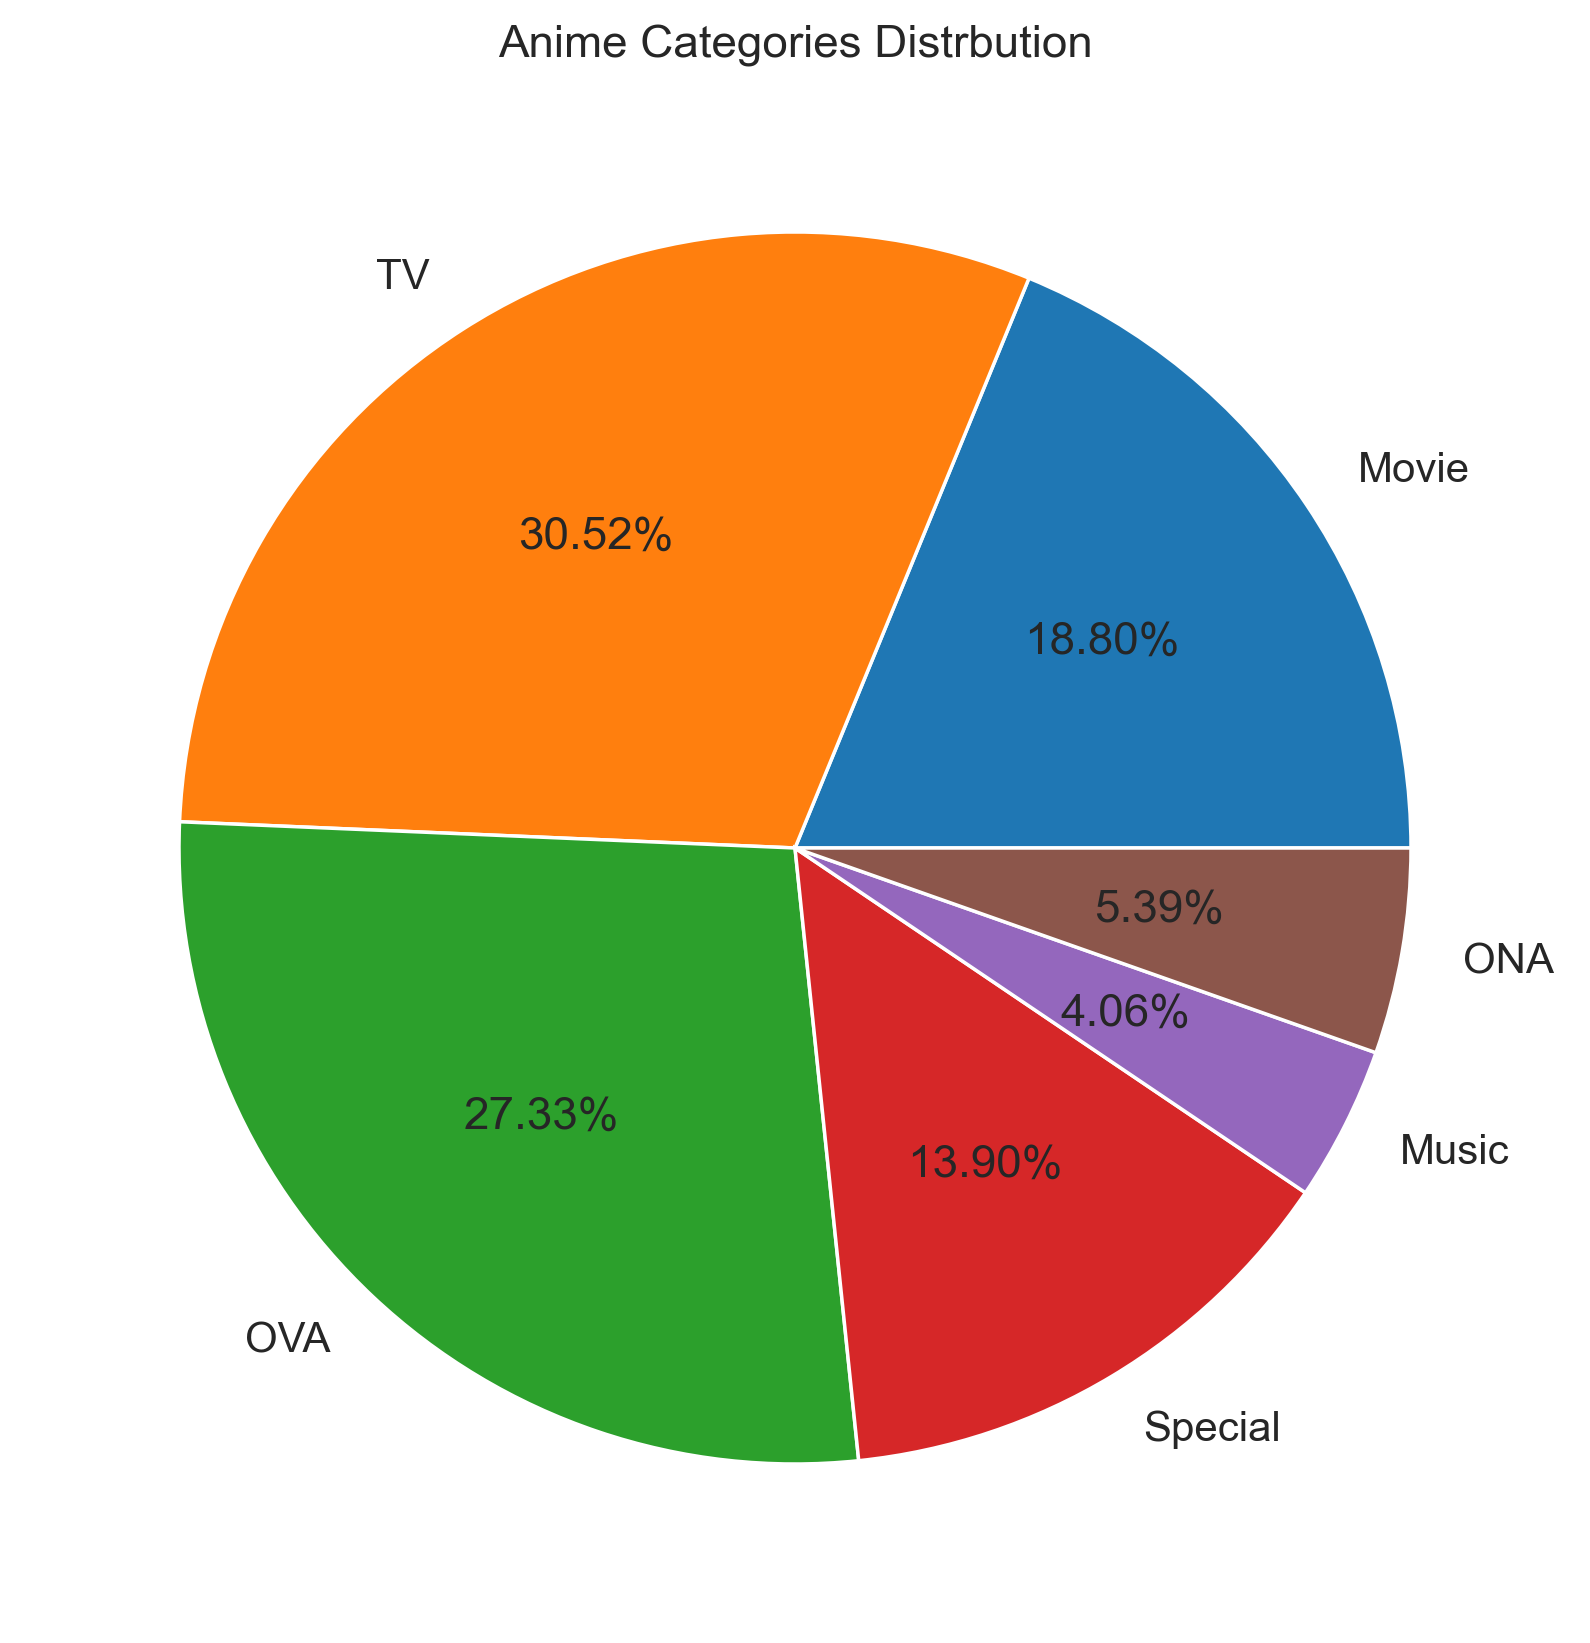

In [671]:
sizes = []
labels = []
for i in anime_df['type'].unique():
    labels.append(i)
    sizes.append(len(top_anime[top_anime['type']==i]))

plt.pie(x=sizes,labels=labels,autopct="%.2f%%")
plt.title('Anime Categories Distrbution')
plt.show()

### Overall anime ratings

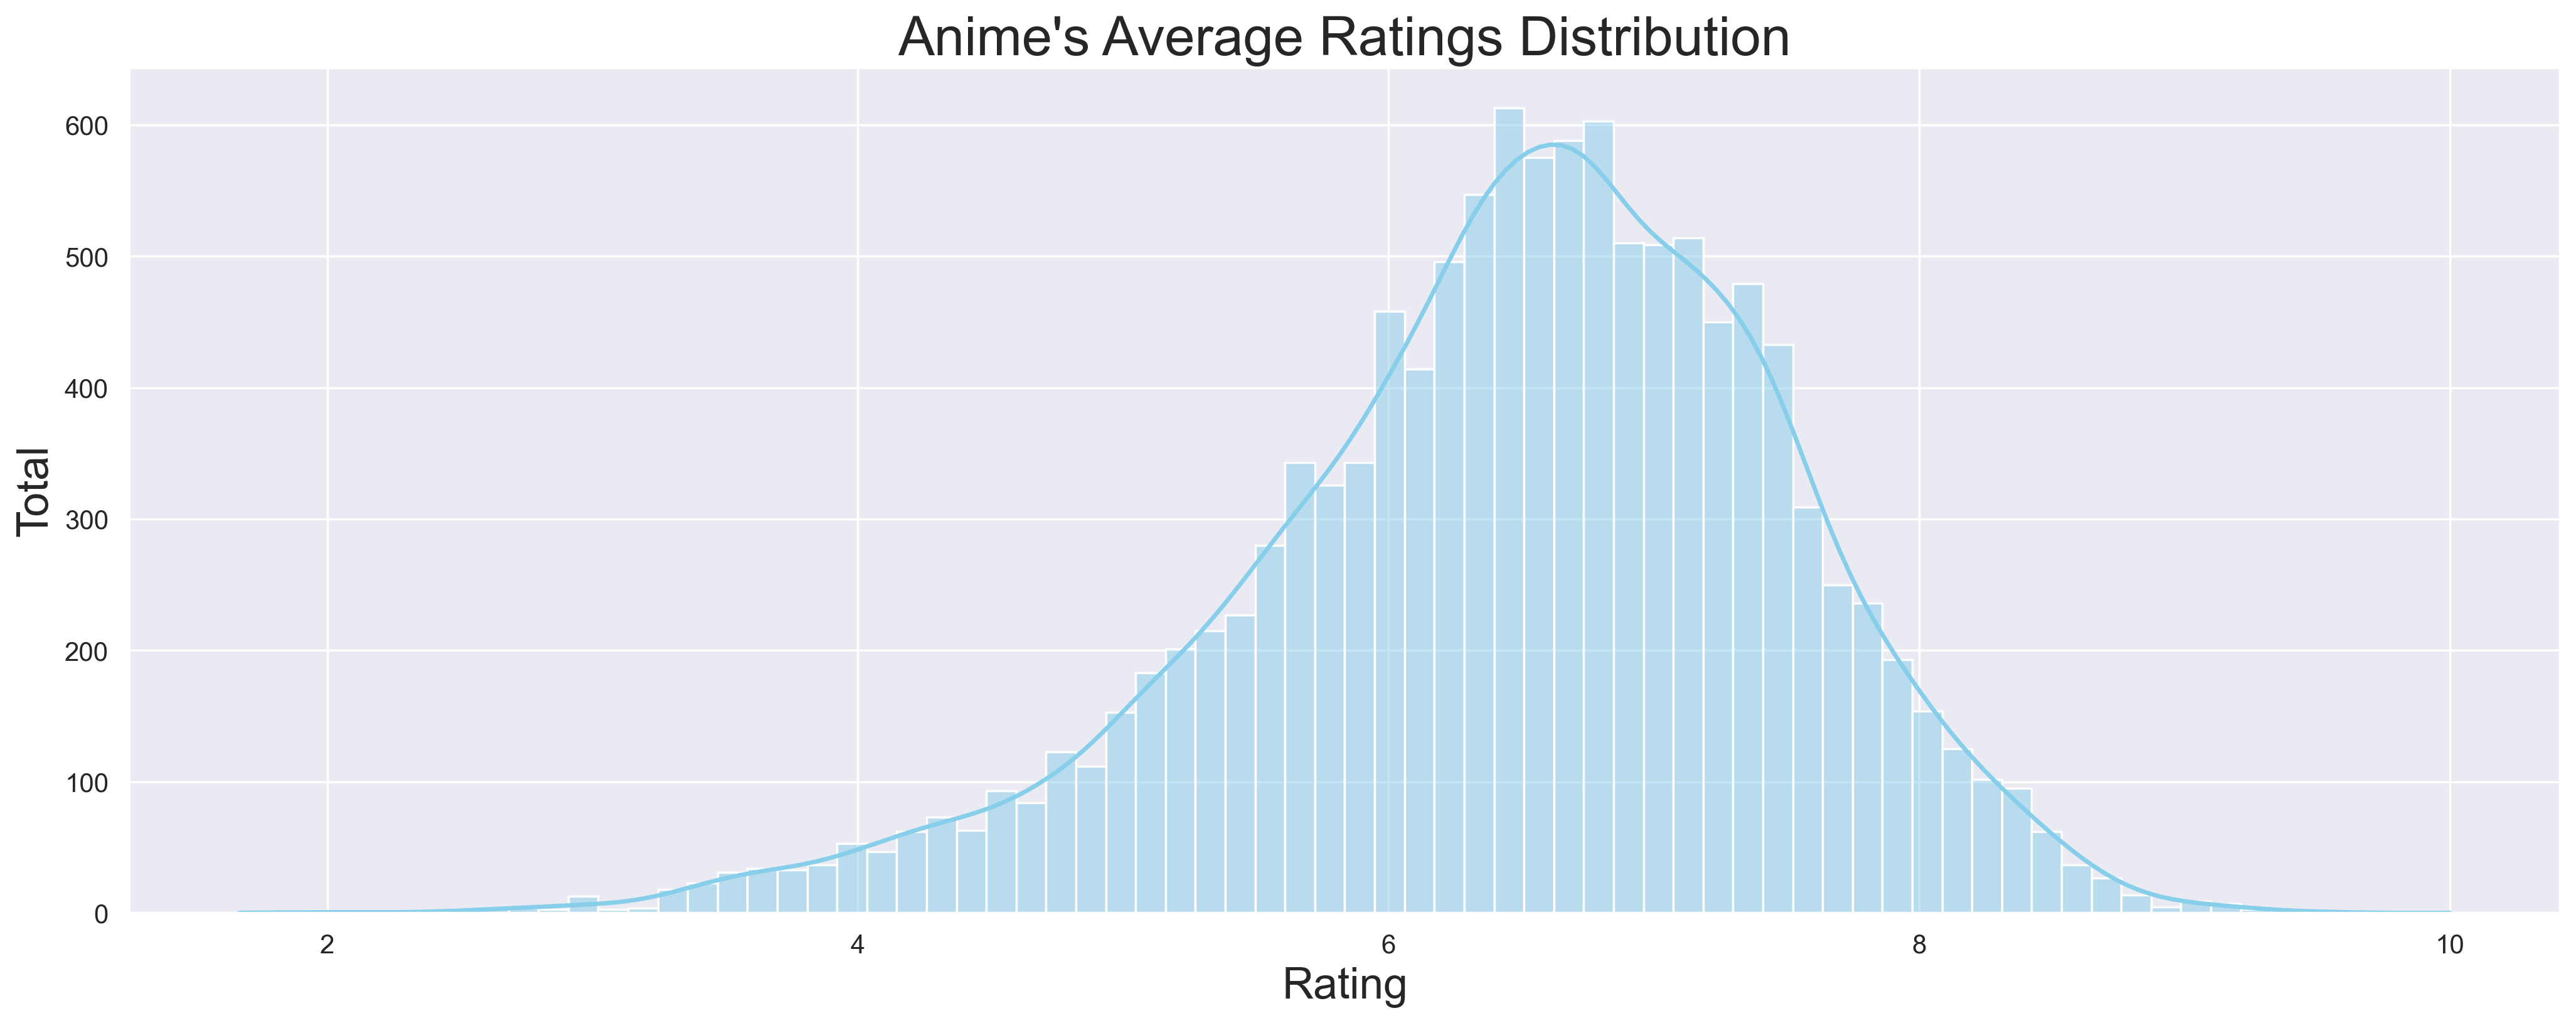

In [672]:
plt.figure(figsize=(20, 7))

sns.histplot(x="rating", kde=True, data=anime_df,color='skyblue')
plt.title("Anime's Average Ratings Distribution", fontsize=25)
plt.xlabel("Rating", fontsize=20)
plt.ylabel("Total", fontsize=20)
plt.show()

### Anime genres

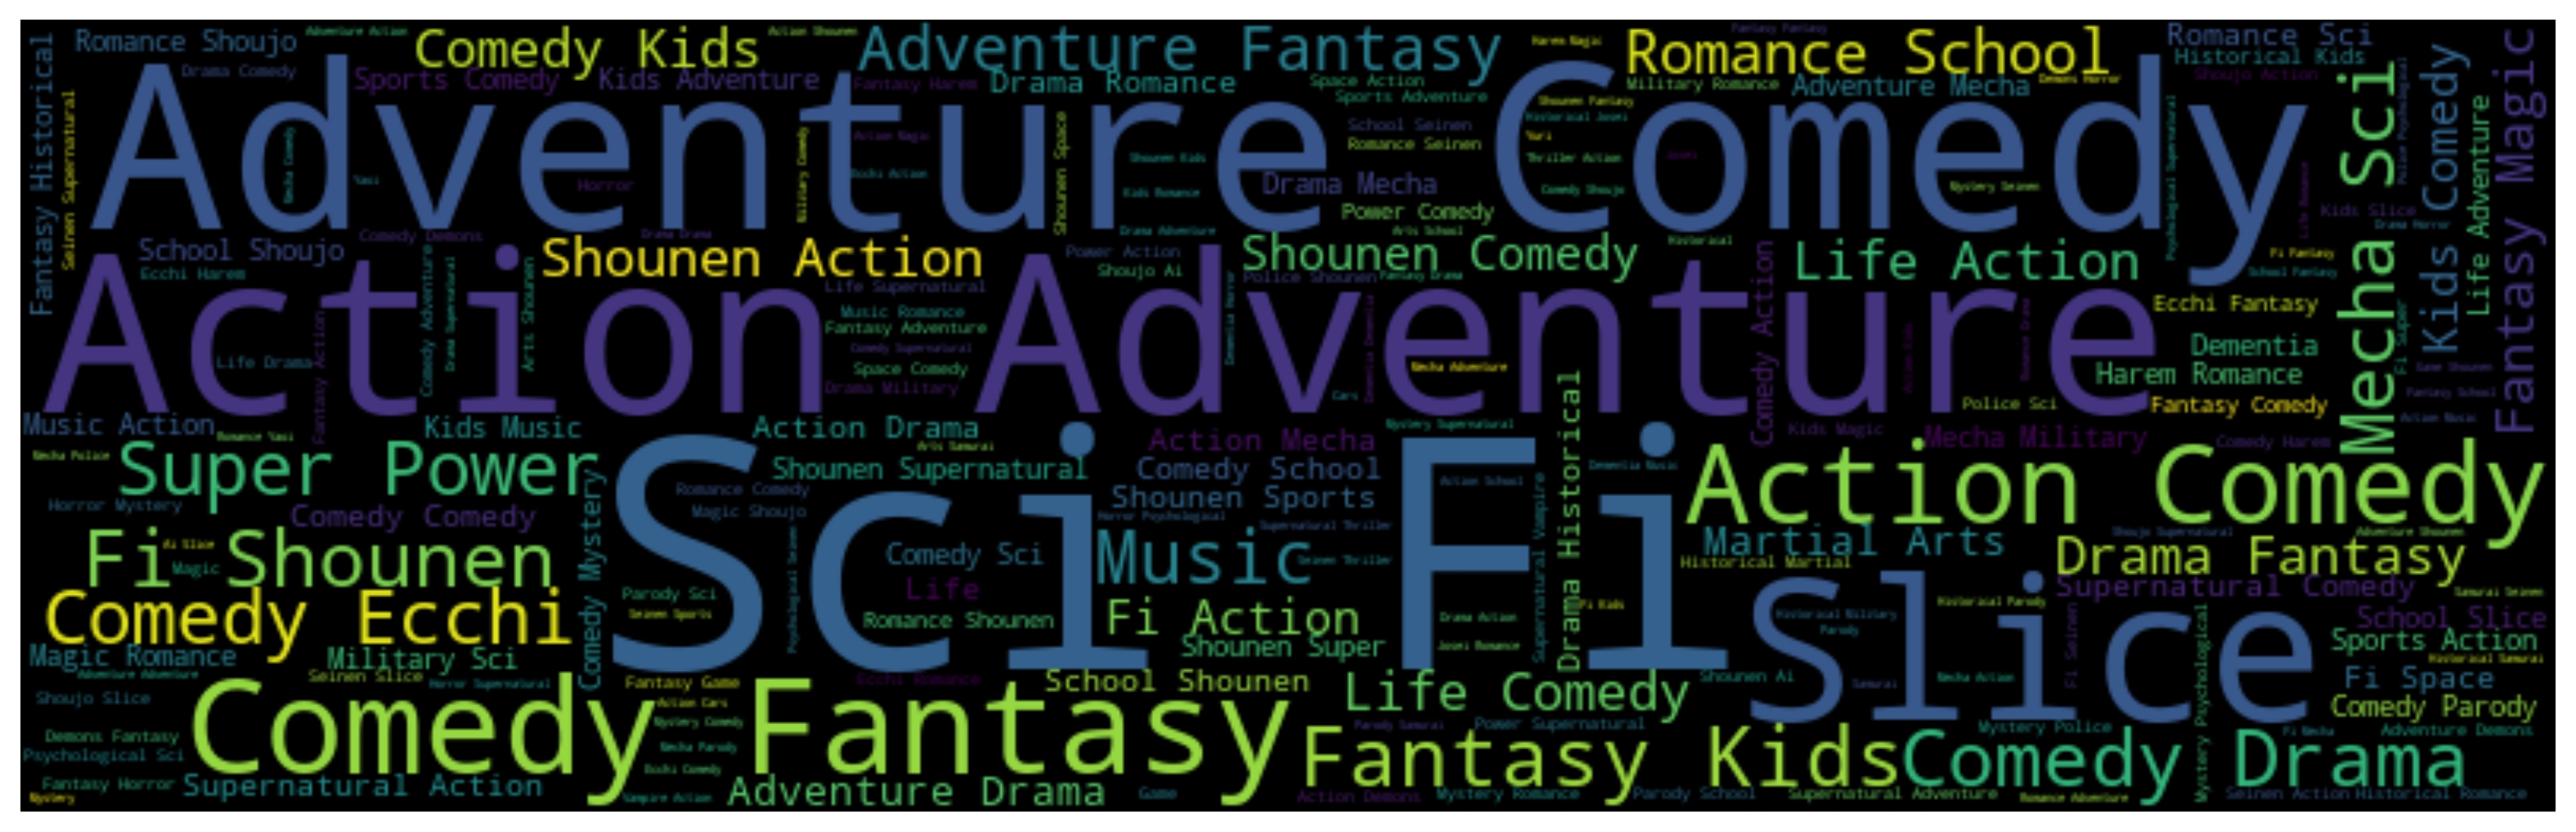

In [673]:
# Using a word cloud to visualize the distribution of popular genres
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=250, background_color="black").generate(anime_df["genre"].str.cat(sep=", ").replace("Hentai",""))

# plt.figure(figsize=(20, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Anime length

In [674]:
# check unique value of episode
np.sort(anime_df['episodes'].unique())

array(['1', '10', '100', '1006', '101', '102', '103', '104', '105', '108',
       '109', '11', '110', '112', '113', '114', '115', '117', '119', '12',
       '120', '124', '125', '127', '1274', '128', '13', '130', '1306',
       '132', '136', '137', '14', '140', '141', '142', '1428', '143',
       '145', '147', '1471', '148', '15', '150', '151', '153', '154',
       '155', '156', '1565', '16', '161', '162', '163', '164', '167',
       '17', '170', '172', '175', '178', '1787', '18', '180', '1818',
       '182', '19', '191', '192', '193', '195', '199', '2', '20', '200',
       '201', '203', '21', '22', '220', '224', '225', '23', '237', '24',
       '240', '243', '25', '26', '260', '263', '27', '276', '28', '283',
       '29', '291', '296', '3', '30', '300', '305', '31', '312', '32',
       '33', '330', '331', '34', '35', '358', '36', '365', '366', '37',
       '373', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46',
       '47', '475', '48', '49', '5', '50', '51', '510', '52', '5

In [675]:
anime_df[anime_df['episodes'] == "Unknown"]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
11381,32238,"Watashi wa, Kairaku Izonshou",Hentai,OVA,Unknown,6.32,1569
11485,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,Unknown,6.14,1992
11757,30770,Maid-san to Boin Damashii,"Harem, Hentai",OVA,Unknown,5.71,1498
11778,33125,Shiiku x Kanojo: Tenshi no Kousoku-hen,Hentai,OVA,Unknown,5.68,1326


In [676]:
# setting the value of unknown episodes to -1
anime_df.loc[anime_df['episodes'] == 'Unknown', 'episodes'] = '-1'

In [677]:
anime_df.loc[:'episodes','episodes']

0         1
1        64
2        51
3        24
4        51
         ..
12012     1
12013     1
12014     4
12015     1
12016     1
Name: episodes, Length: 12017, dtype: object

In [678]:
# converting to integer type
anime_df['episodes'] = anime_df['episodes'].astype('int64')

[]

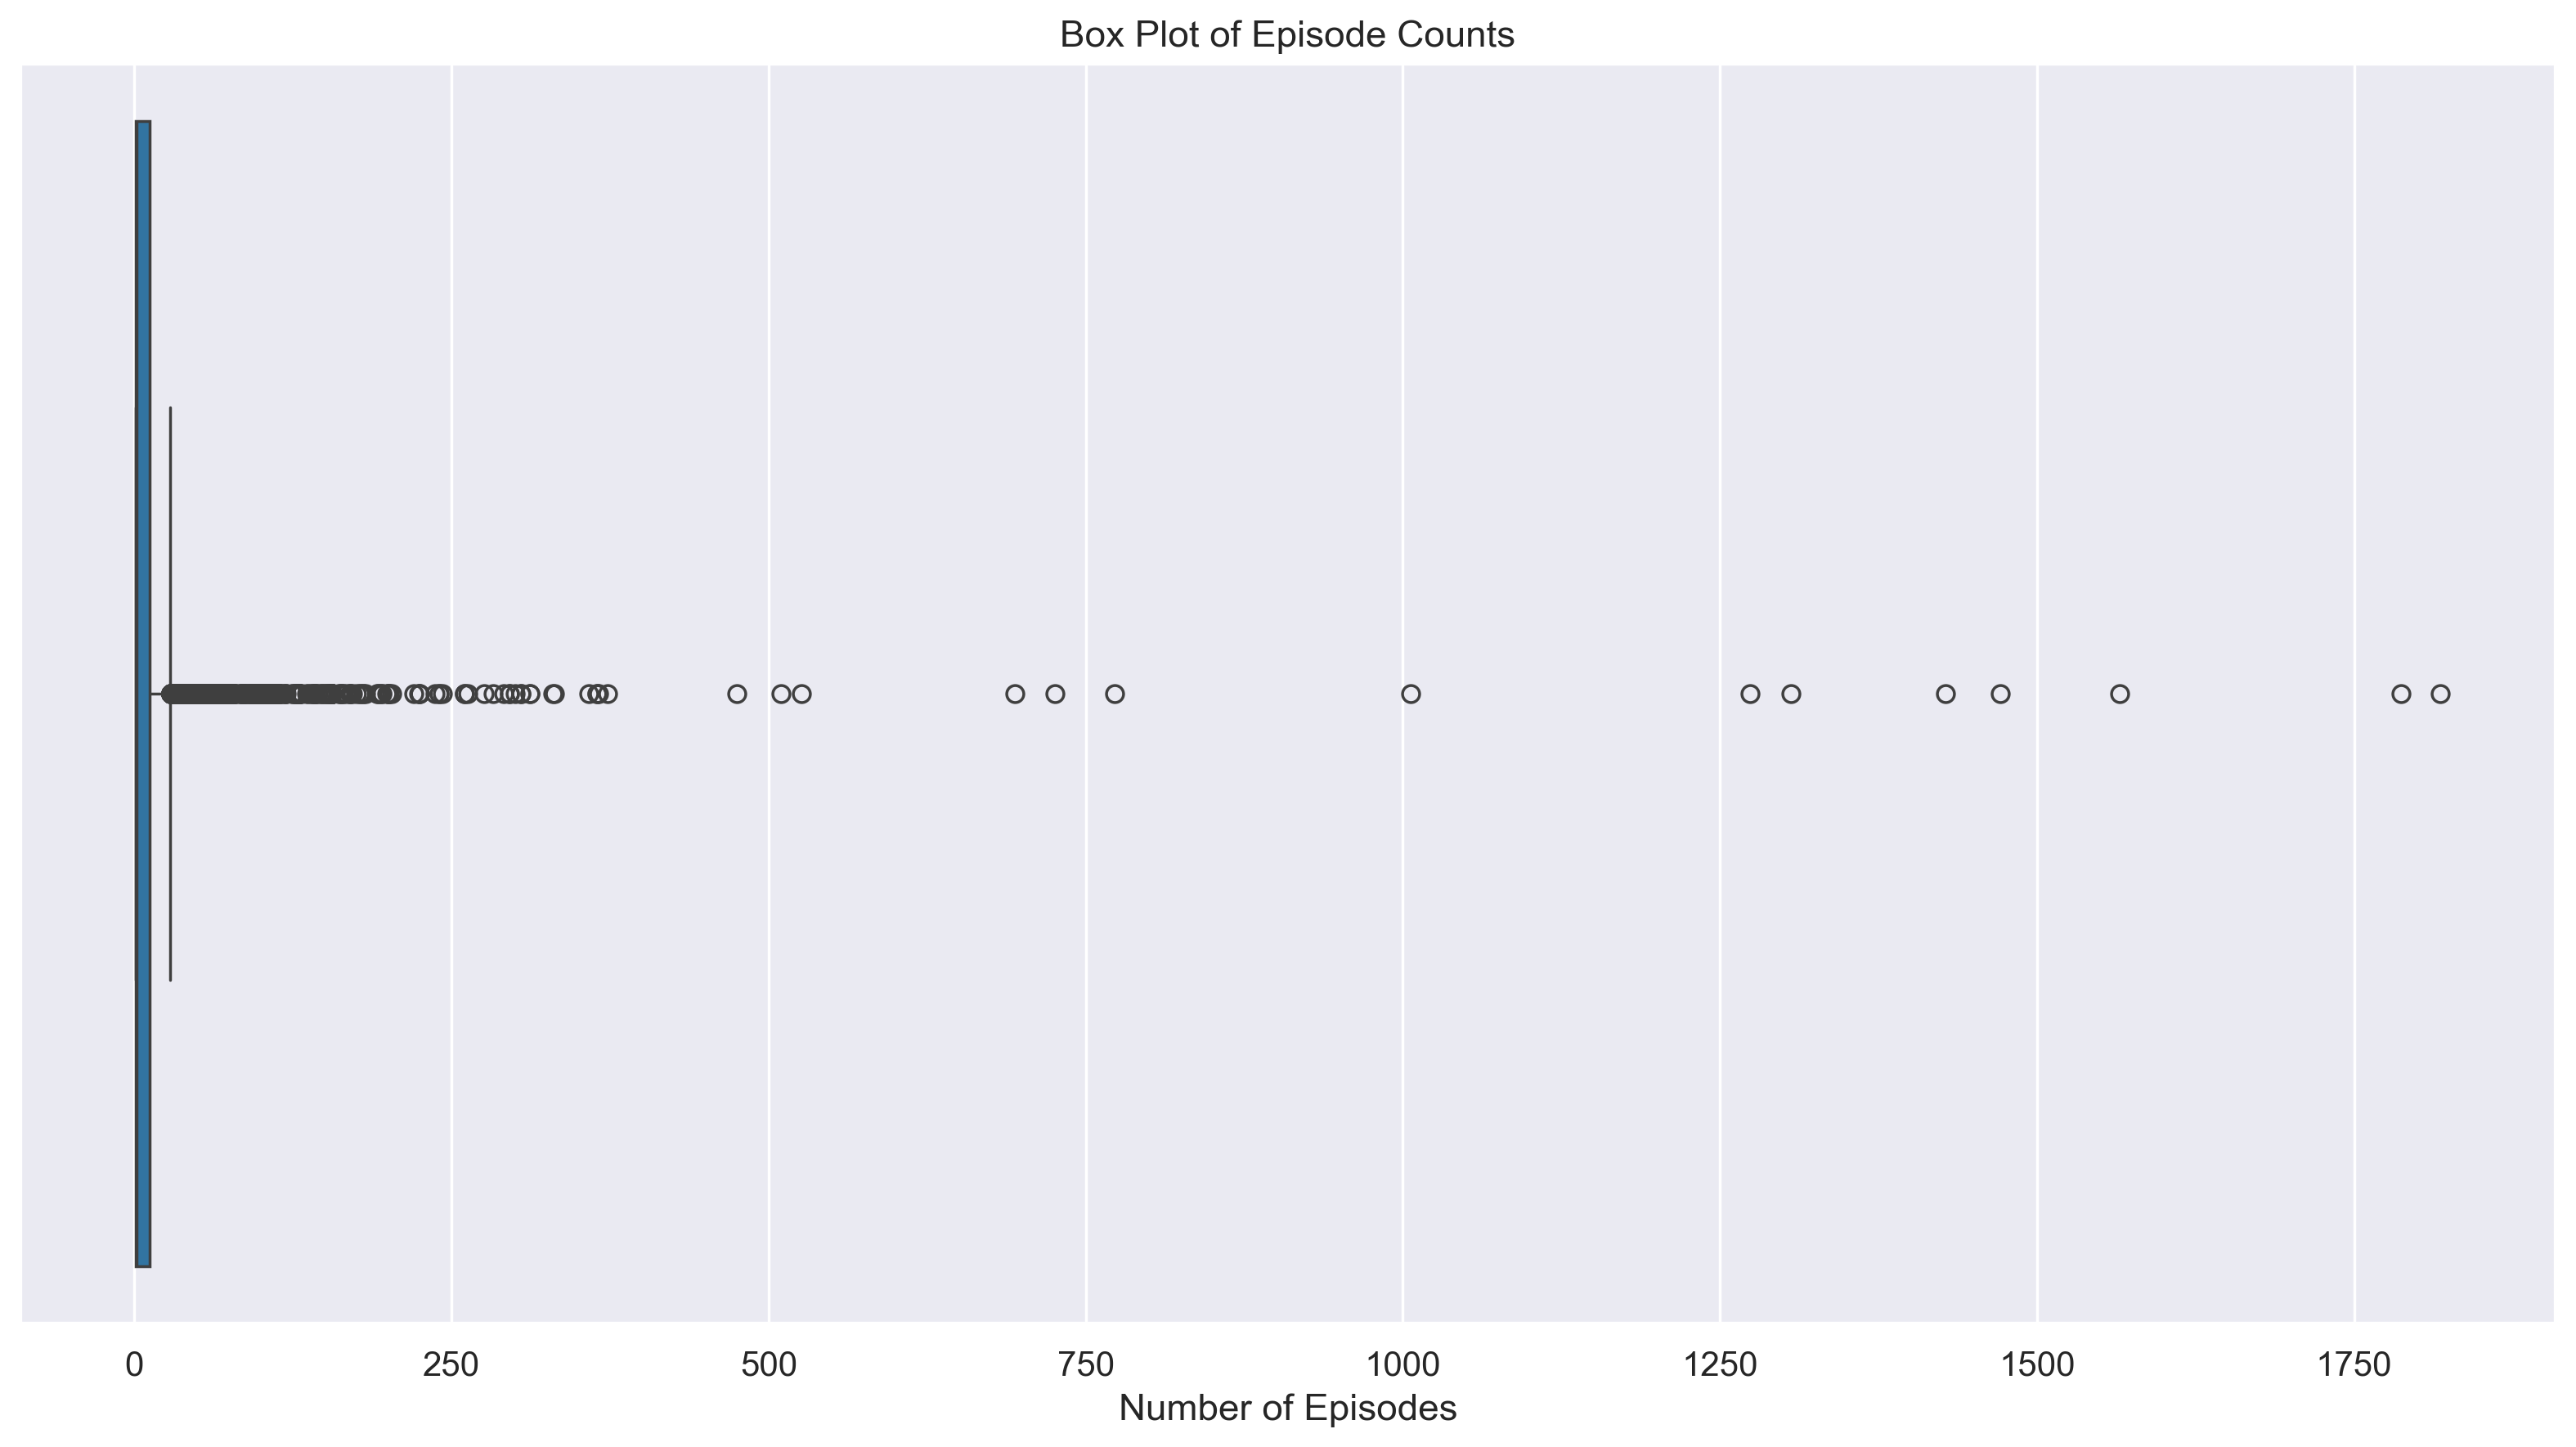

In [679]:
# Visualize boxplot for episodes's number
boxplot_data = anime_df.loc[anime_df['episodes'] != -1,'episodes']
# plt.figure(figsize=(10,6))
# sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.boxplot(x= boxplot_data,orient='h')

plt.title("Box Plot of Episode Counts")
plt.xlabel("Number of Episodes")

plt.plot()


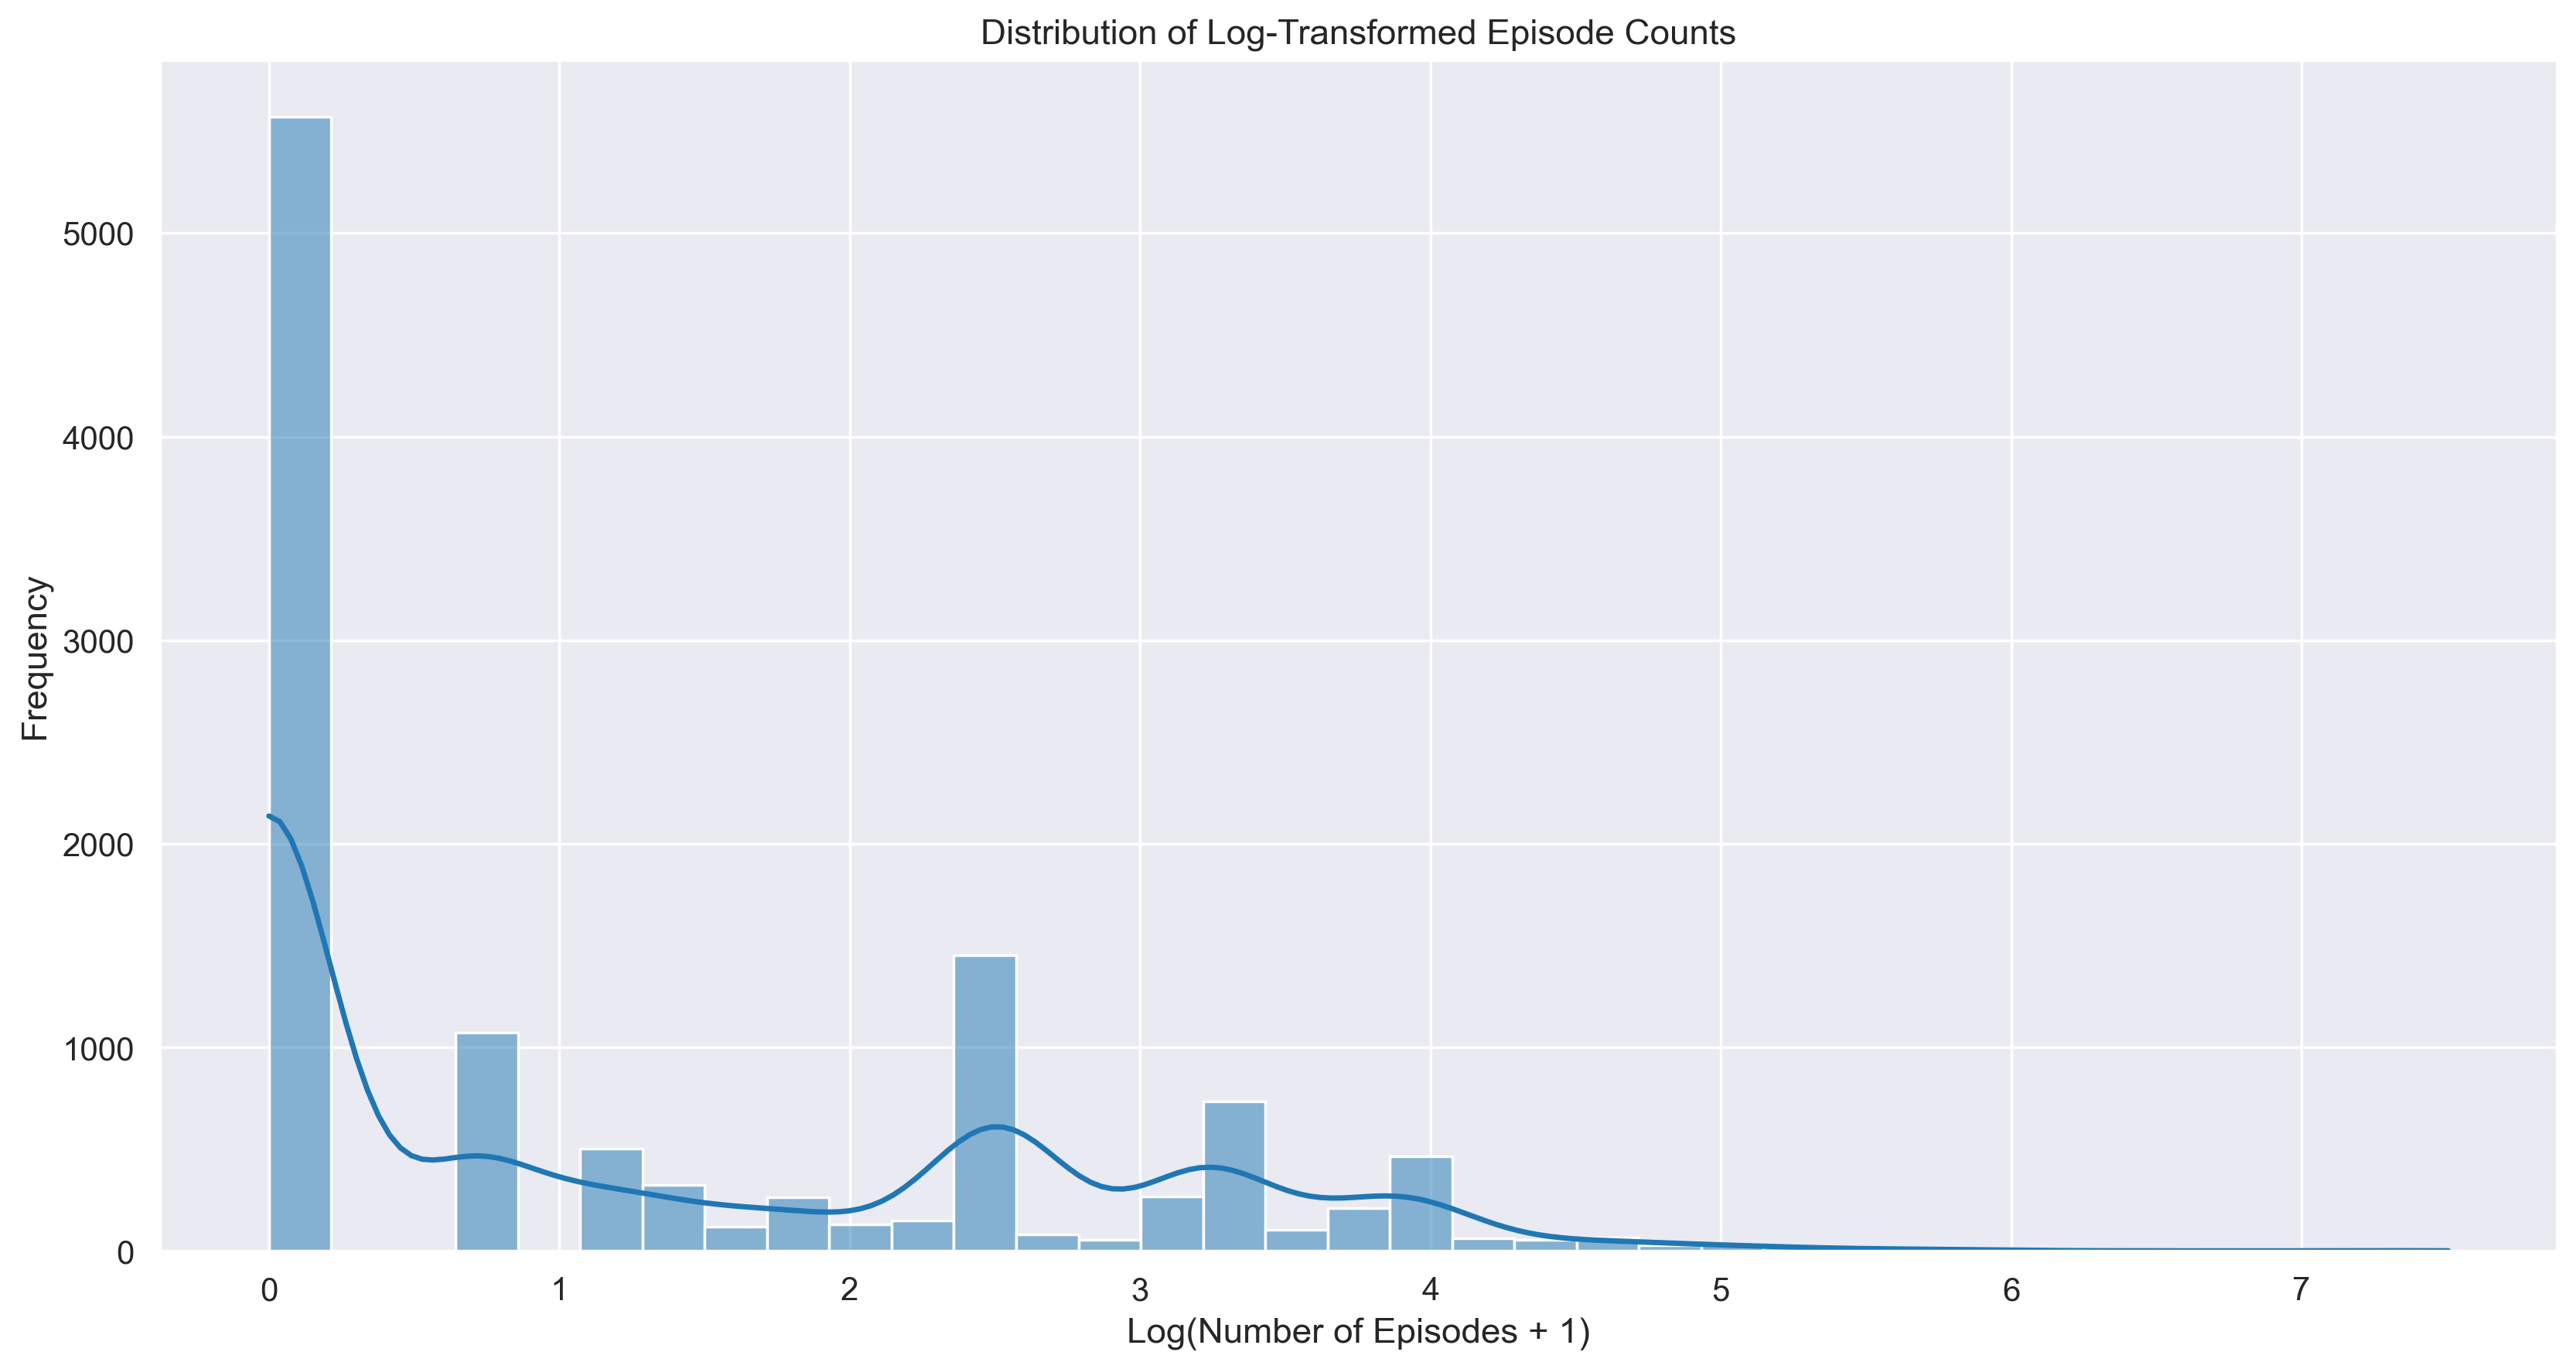

In [680]:
# Apply log transformation
log_episodes = np.log(anime_df['episodes'])  # log1p to avoid log(0)

# Log-transformed histogram
# plt.figure(figsize=(10, 6))
sns.histplot(log_episodes, kde=True)
plt.title("Distribution of Log-Transformed Episode Counts")
plt.xlabel("Log(Number of Episodes + 1)")
plt.ylabel("Frequency")
plt.show()
